In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import  layers


Using TensorFlow backend.


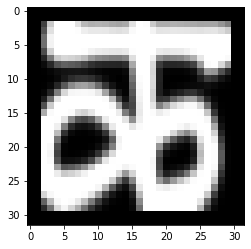

In [3]:
img= cv2.imread('files/train/character_1_ka/10976.png',1)

plt.imshow(img)

In [4]:
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
S=32 # shape of your image

trainGen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
testGen = ImageDataGenerator(rescale=1./255)

train_set= trainGen.flow_from_directory('files/Train',
                                        target_size=(S, S),
                                        color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical',
                                       subset="training")
test_set= testGen.flow_from_directory('files/Test',
                                        target_size=(S, S),
                                        color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical')

val_set=trainGen.flow_from_directory('files/Train',
                                        target_size=(S, S),
                                        color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical',
                                       subset="validation")

Found 70380 images belonging to 46 classes.
Found 493 images belonging to 2 classes.
Found 7820 images belonging to 46 classes.


In [6]:
train_set[0][1]

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPool2D

In [8]:
model = Sequential()
model.add(Conv2D(filters =5,kernel_size=(3,3), padding='same', input_shape=(S,S,1), activation='relu', data_format="channels_last"))
#model.add(Conv2D(filters =5, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dense(46,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 5)         50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 5)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 490)               0

In [9]:
model.compile('adam', 'categorical_crossentropy',metrics=['acc'])

In [ ]:
model.fit_generator(train_set, steps_per_epoch=100,epochs=20,validation_data=val_set,
                           validation_steps=10)

Epoch 1/20
100/100 [==============================] - 48s 476ms/step - loss: 3.3356 - acc: 0.1678 - val_loss: 2.5107 - val_acc: 0.3250
Epoch 2/20
100/100 [==============================] - 30s 304ms/step - loss: 2.0585 - acc: 0.4500 - val_loss: 1.9155 - val_acc: 0.4281
Epoch 3/20
100/100 [==============================] - 27s 270ms/step - loss: 1.5664 - acc: 0.5603 - val_loss: 1.5088 - val_acc: 0.6031
Epoch 4/20
100/100 [==============================] - 24s 238ms/step - loss: 1.3078 - acc: 0.6281 - val_loss: 1.4351 - val_acc: 0.5781
Epoch 5/20
100/100 [==============================] - 23s 234ms/step - loss: 1.1445 - acc: 0.6622 - val_loss: 1.2254 - val_acc: 0.6344
Epoch 6/20
100/100 [==============================] - 29s 295ms/step - loss: 0.9710 - acc: 0.7072 - val_loss: 1.0835 - val_acc: 0.6687
Epoch 7/20
100/100 [==============================] - 25s 252ms/step - loss: 0.8955 - acc: 0.7422 - val_loss: 0.9819 - val_acc: 0.7250
Epoch 8/20
 98/100 [============================>.] - E

In [10]:
#model.fit(train_set, epochs=5,steps_per_epoch=70380,validation_data=val_set,validation_steps=7820)

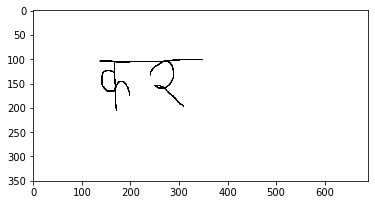

In [11]:
img= cv2.imread('filo/filo/DCR/kaaraa.png',0)

plt.imshow(img, cmap="gray")

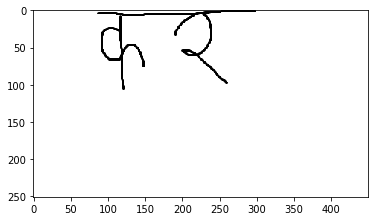

In [12]:
plt.imshow(img[100:500,50:500],cmap="gray")  #manually cropping image from row and column

In [13]:
#testGen=ImageDataGenerator(rescale=1./255)

#test_set=testGen.flow_from_directory('filo/filo/DCR',target_size=(S,S),color_mode='rgb',batch_size=2, class_mode='categorical')

In [1]:
def crop(img, thresh=0):
    size = img.shape
    print(size)
    edit_image=img.copy()
    #thresh = 0 #background pixel value

    thresh= thresh

    bg_pixels= np.repeat(thresh,size[1])#size [1] takes no. of colum 

    top=0
    count=0

    for row in range(1, size[0]):
        if np.equal(bg_pixels,img[row]).any()==True:
            top = row
            #count+=1
            break
    return top
top = crop(img)
bottom=crop(img[::-1])
right=crop(img.T)
left=crop(img.T[::-1])


NameError: name 'img' is not defined

In [15]:
# bottom crop , left rigt crop in open cv Task

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


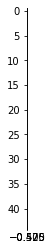

In [16]:
#plt.imshow(edit_image[top:])

plt.imshow(img[top:bottom,left:right])

In [ ]:
def crop(img, thresh=0):
    size = img.shape
    print(size)
    edit_image=img.copy()
    #thresh = 0 #background pixel value

    thresh= thresh

    bg_pixels= np.repeat(thresh,size[1])#size [1] takes no. of colum 

    top=0
    count=0
    
    crop_value=int(20*size[0]/ 604)
    for row in range(1, size[0]):
        if np.equal(bg_pixels,img[row]).any()==True:
            
            count+=1
        else:
            pass
        
        if count>=crop_value:
            top=row-crop_value
            break
            
    return top
top = crop(img)
bottom=crop(img[::-1])
right=crop(img.T)
left=crop(img.T[::-1])
